In [27]:
import pickle
import time

from src.data_loader import *
from src.visualization import *

%load_ext autoreload
%autoreload 1
%aimport src.data_loader
%aimport src.visualization

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
data = pd.read_csv("./data/item_data.csv")
data = data_processing(data)

Created and saved new LabelEncoder.


In [38]:
data[["technology_name", "multiclass_labels"]]

,technology_name,multiclass_labels
0,FDM,5
1,MJF,11
2,CNC (Metal),2
3,CNC (Metal),2
4,CNC (Metal),2
...,...,...
64858,CNC (Metal),2
64859,CNC (Metal),2
64860,CNC (Metal),2
64861,CNC (Metal),2


In [47]:
data.head()

,item_id,faces,edges,vertices,file_name,depth,width,height,area,volume,...,bbox_volume,quantity,technology_id,material_id,post_processing_id,download_file_url,technology_name,material_name,Is_CNC,multiclass_labels
0,100033,3792.0,11286.0,7524.0,100033_Design_8.step,154.600000,66.000000,154.600000,259187.574998,854521.623711,...,1.577477e+06,1,3cbbeb15-b617-431e-84b4-d2d8fa144cf3,100,[127],https://prod-mv-user-files-upload.s3.eu-centra...,FDM,Other material (manual request),0,5
1,100034,568.0,1479.0,956.0,100034_5_77_v2.STEP,563.089004,98.888454,518.719571,796131.889763,912613.085344,...,2.888386e+07,1,bed1f100-32c8-42b2-9735-1e36286c7823,13,[74],https://prod-mv-user-files-upload.s3.eu-centra...,MJF,PA12,0,11
2,100035,216.0,637.0,423.0,100035_MakerVerse_Sample.step,163.662476,185.610681,163.662476,208702.010756,963533.514386,...,4.971657e+06,1,feb0f26f-94a5-4be2-9d40-761bb2857ab6,813,[1000],https://prod-mv-user-files-upload.s3.eu-centra...,CNC (Metal),Aluminum 6082 (3.2315),1,2
3,100036,216.0,637.0,423.0,100036_MakerVerse_Sample.step,163.662476,185.610681,163.662476,208702.010756,963533.514386,...,4.971657e+06,1,feb0f26f-94a5-4be2-9d40-761bb2857ab6,813,[1000],https://prod-mv-user-files-upload.s3.eu-centra...,CNC (Metal),Aluminum 6082 (3.2315),1,2
4,100040,216.0,637.0,423.0,100040_00048125_Stator_Pump.step,163.662476,185.610681,163.662476,208702.010756,963533.514386,...,4.971657e+06,1,feb0f26f-94a5-4be2-9d40-761bb2857ab6,813,[1000],https://prod-mv-user-files-upload.s3.eu-centra...,CNC (Metal),Aluminum 6082 (3.2315),1,2


In [48]:
le = joblib.load("./models/label_encoder.pkl")

# Show the classes in order
print(list(le.classes_))

['Binder Jetting (Metal)', 'CNC', 'CNC (Metal)', 'CNC (Polymer)', 'DLP', 'FDM', 'Injection Molding', 'LPBF', 'Laser Cutting', 'Laser Cutting (Metal)', 'Laser Cutting (Polymer)', 'MJF', 'Other Technology', 'Other Technology (Metal)', 'Other Technology (Polymer)', 'Polyjet', 'Rapid Casting', 'SLA', 'SLA (Resin)', 'SLS', 'Sheet Metal Fabrication', 'Vacuum Casting', 'WAAM']


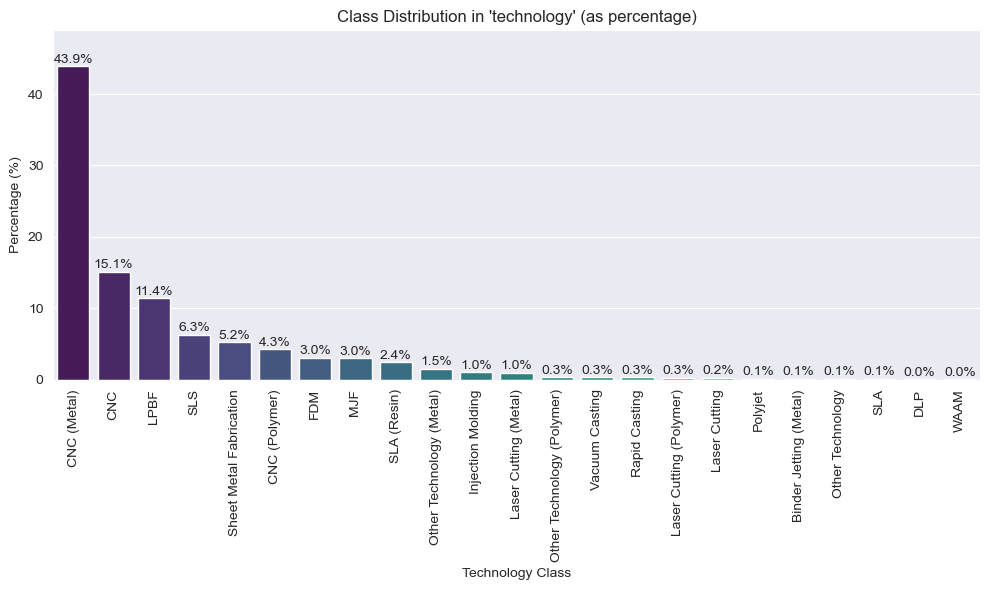

In [52]:
plot_class_distribution(data)

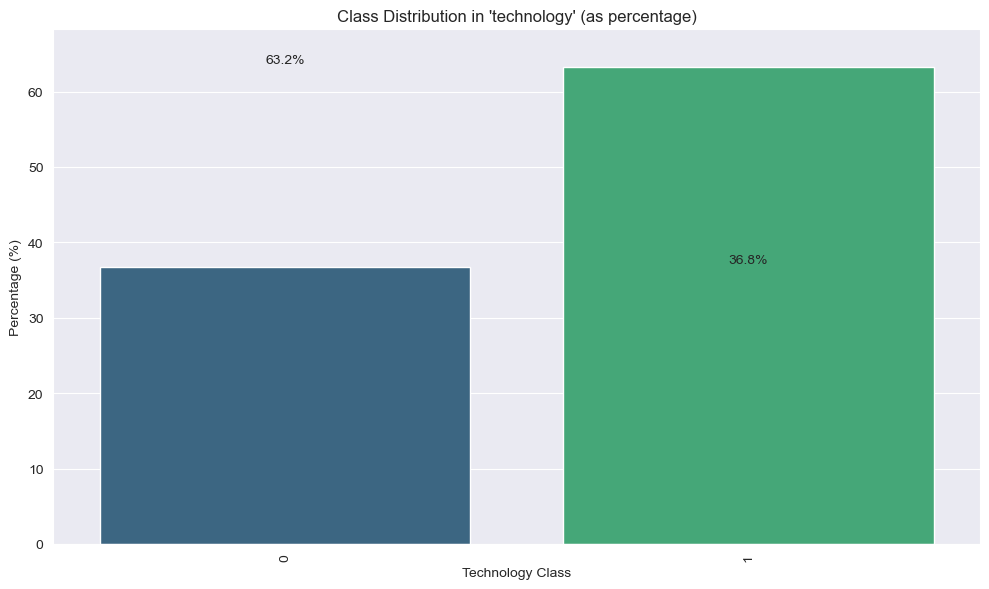

In [41]:
plot_class_distribution(data, target_col="Is_CNC")

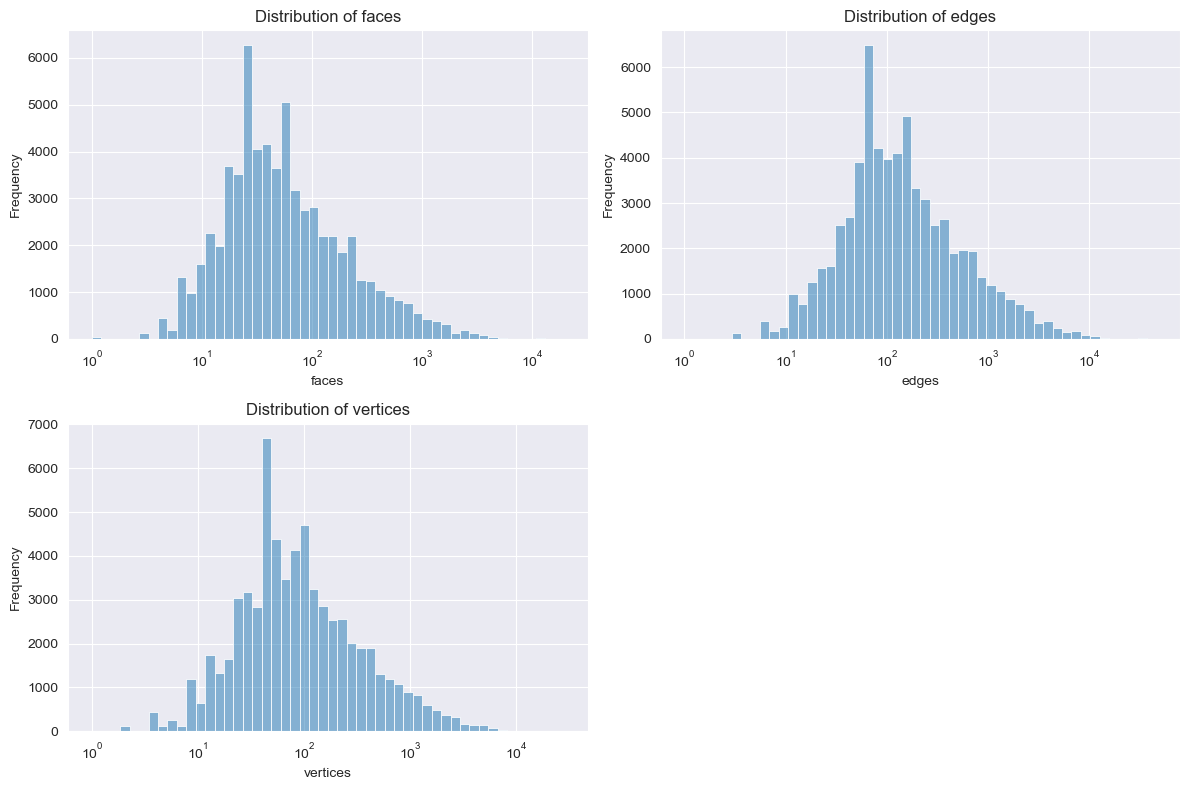

In [58]:
plot_topological_features_distribution(data, ["faces", "edges", "vertices"])

In [40]:
sync_dataset = pd.read_csv("./data/synced_dataset.csv")
sync_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62671 entries, 0 to 62670
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   item_id             62671 non-null  int64  
 1   faces               62671 non-null  float64
 2   edges               62671 non-null  float64
 3   vertices            62671 non-null  float64
 4   file_name           62671 non-null  object 
 5   depth               62671 non-null  float64
 6   width               62671 non-null  float64
 7   height              62671 non-null  float64
 8   area                62671 non-null  float64
 9   volume              62671 non-null  float64
 10  bbox_depth          62671 non-null  float64
 11  bbox_height         62671 non-null  float64
 12  bbox_width          62671 non-null  float64
 13  bbox_area           62671 non-null  float64
 14  bbox_volume         62671 non-null  float64
 15  quantity            62671 non-null  int64  
 16  tech